In [2]:
import numpy as np
import matplotlib.pyplot as plt

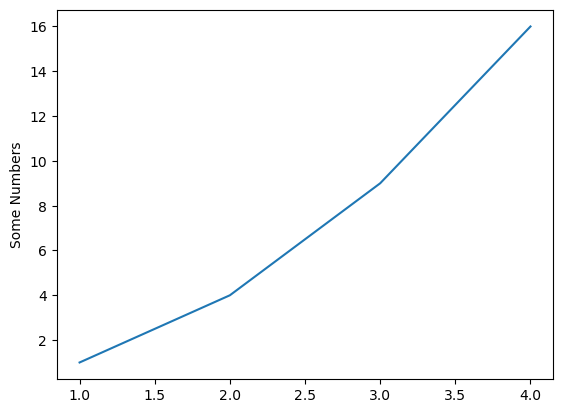

In [2]:
plt.plot([1, 2, 3,4], [1, 4, 9, 16])
plt.ylabel("Some Numbers")
plt.show()

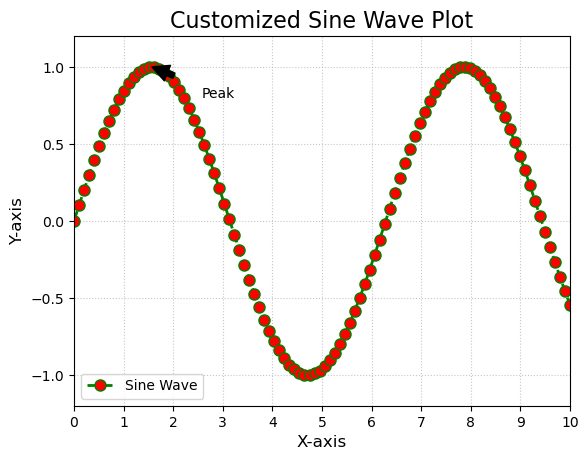

In [3]:
x = np.linspace(0, 10,100)
y = np.sin(x)

plt.plot(x, y, color = 'green', linestyle='--', linewidth = 2, marker='o',
         markersize=8, markerfacecolor= 'red', label='Sine Wave')

plt.title('Customized Sine Wave Plot', fontsize = 16)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)

plt.xlim(0, 10)
plt.ylim(-1.2, 1.2)
plt.xticks(np.arange(0,11,1))
plt.yticks(np.arange(-1, 1.1, 0.5))

plt.grid(True, linestyle=':', alpha=0.7)

plt.annotate('Peak', xy=(np.pi/2, 1), xytext=(np.pi/2 + 1, 0.8), 
             arrowprops=dict(facecolor='black', shrink=0.5), fontsize=10)

plt.legend()

plt.show()

In [4]:
# Figures
plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

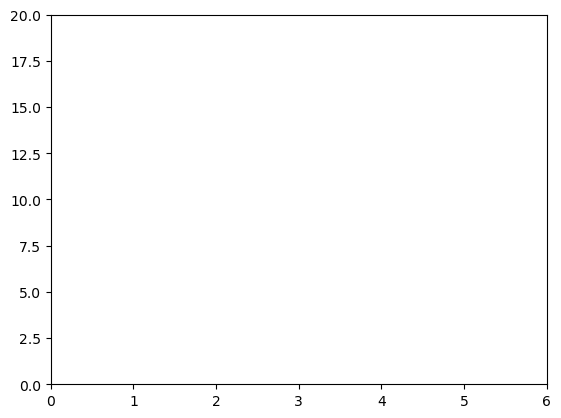

In [5]:
# Axes
plt.figure()
plt.axis([0, 6, 0, 20])
plt.show()

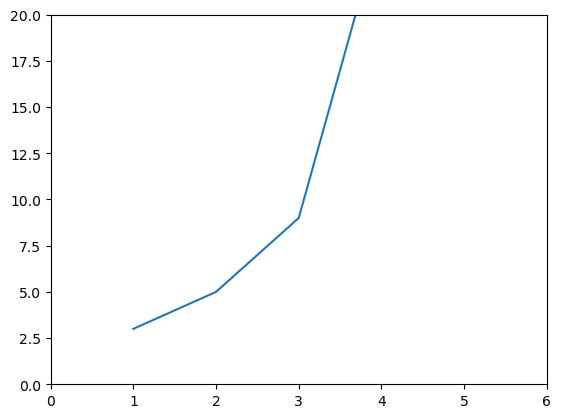

In [6]:
# Plot
plt.figure()
plt.axis([0, 6, 0, 20], )
plt.plot([1, 2, 3, 4], [3, 5, 9, 25])
plt.show()

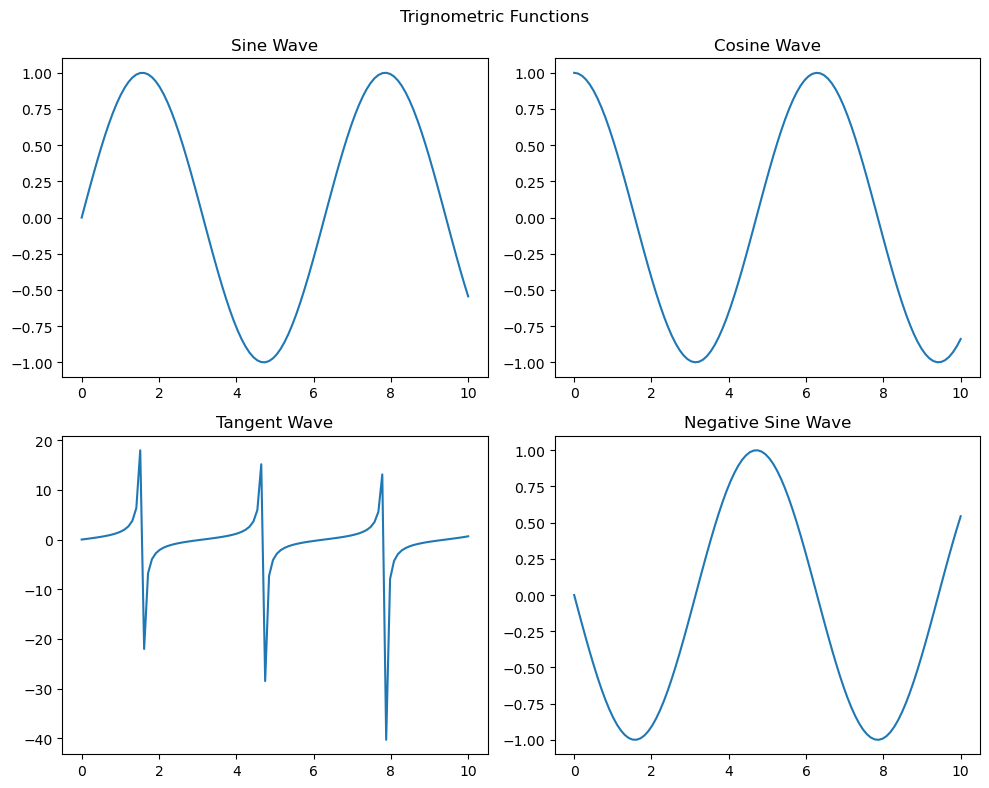

In [7]:
# Plotting multiple axes on one figure

x = np.linspace(0, 10, 100)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].plot(x, np.sin(x))
axes[0, 0].set_title("Sine Wave")

axes[0, 1].plot(x, np.cos(x))
axes[0, 1].set_title("Cosine Wave")

axes[1, 0].plot(x, np.tan(x))
axes[1, 0].set_title("Tangent Wave")

axes[1,1].plot(x, -np.sin(x))
axes[1, 1].set_title("Negative Sine Wave")

fig.suptitle("Trignometric Functions")
plt.tight_layout()
plt.show()

### Features of the Diabetes Dataset

The diabetes dataset contains 10 features (columns) and 442 instances (rows). The features are as follows:

	1.	age: Age in years

	2.	sex: Gender

	3.	bmi: Body Mass Index

	4.	bp: Average blood pressure

	5.	s1: T-Cells (a type of white blood cells)

	6.	s2: Low-Density Lipoproteins

	7.	s3: High-Density Lipoproteins
	
	8.	s4: Thyroid Stimulating Hormone
	
	9.	s5: Lamotrigine level
	
	10.	s6: Blood Sugar Level
	


In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### Line Graph

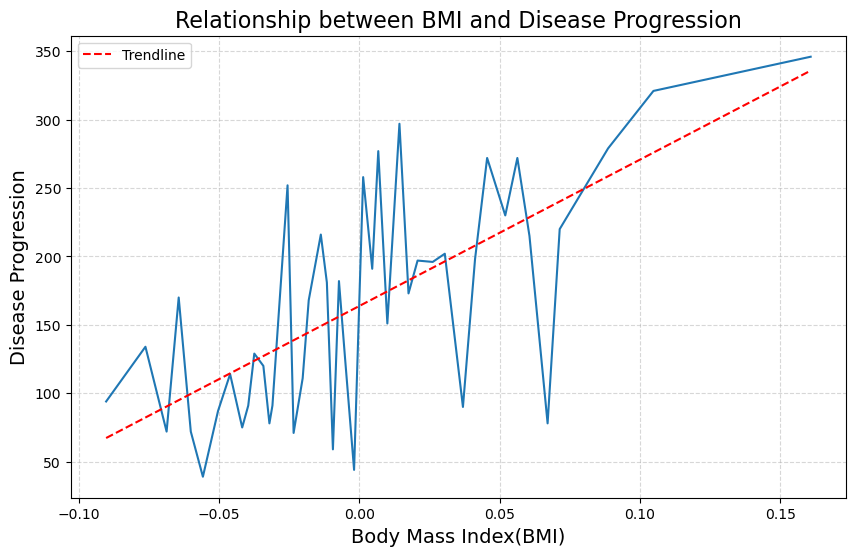

In [5]:
df_sorted = df.sort_values(by='bmi')
sampled_df = df_sorted.iloc[::10, :]

plt.figure(figsize=(10, 6))

plt.plot(sampled_df['bmi'], sampled_df['target'])

z = np.polyfit(sampled_df['bmi'], sampled_df['target'], 1)
p = np.poly1d(z)
plt.plot(sampled_df['bmi'], p(sampled_df['bmi']), linestyle='--', color='red', label='Trendline')


plt.title('Relationship between BMI and Disease Progression', fontsize = 16)
plt.xlabel('Body Mass Index(BMI)', fontsize= 14)
plt.ylabel('Disease Progression', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### Scatter plot

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_80974/3012058539.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


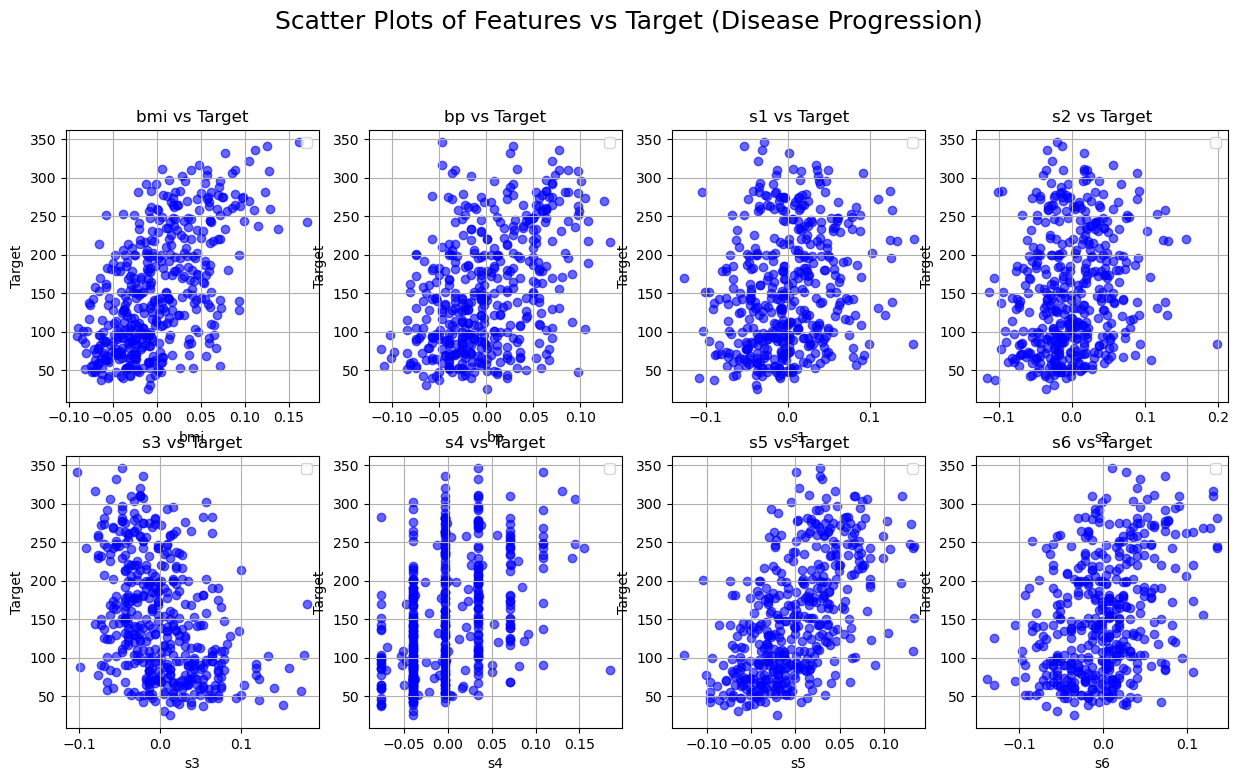

In [ ]:
fix, axes = plt.subplots(3, 4, figsize=(15, 12))
fix.suptitle("Scatter Plots of Features vs Target (Disease Progression)", fontsize=18)

main_features = ['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(main_features):
    axes[i].scatter(df[feature], df['target'], alpha=0.6, color='blue')
    axes[i].set_title(f'{feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')
    
    axes[i].grid(True)

# Remove any empty subplots (if there are)
for j in range(i + 1, len(axes)):
    fix.delaxes(axes[j])



### Bar graph

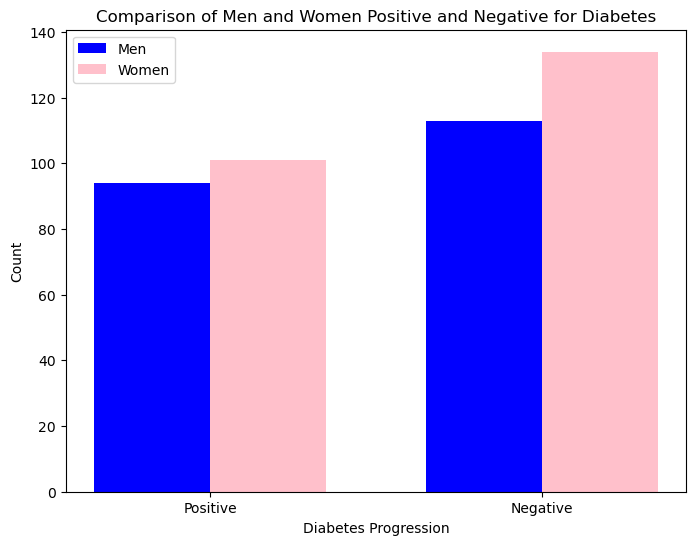

In [12]:

X = diabetes.data
Y = diabetes.target

sex = np.where(X[:, 1] > 0, 1, 0)

threshold = np.mean(Y)
positive = Y >= threshold
negative = Y < threshold

men_positive = np.sum((sex == 1) & positive)
men_negative = np.sum((sex == 1) & negative)
women_positive = np.sum((sex == 0) & positive) 
women_negative = np.sum((sex == 0) & negative) 

labels = ['Positive', 'Negative']
men_counts = [men_positive, men_negative]
women_counts = [women_positive, women_negative]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, men_counts, width, label="Men", color='blue')
ax.bar(x + width/2, women_counts, width, label = 'Women', color='pink')

ax.set_xlabel("Diabetes Progression")
ax.set_ylabel("Count")
ax.set_title('Comparison of Men and Women Positive and Negative for Diabetes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


### Histogram

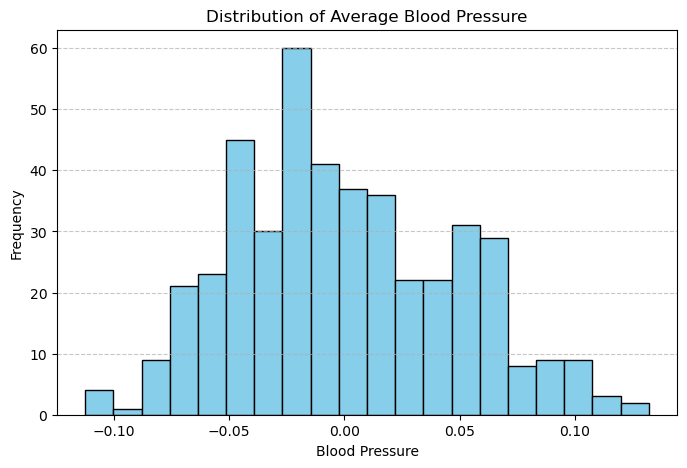

In [13]:
blood_pressure = df['bp']

plt.figure(figsize=(8, 5))
plt.hist(blood_pressure, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha = 0.7)

### Pie charts

In [14]:
print(df['s6'].describe())

count    4.420000e+02
mean     1.130318e-17
std      4.761905e-02
min     -1.377672e-01
25%     -3.317903e-02
50%     -1.077698e-03
75%      2.791705e-02
max      1.356118e-01
Name: s6, dtype: float64


glucose_category
Very High    76
High         47
Normal       45
Low          24
Name: count, dtype: int64


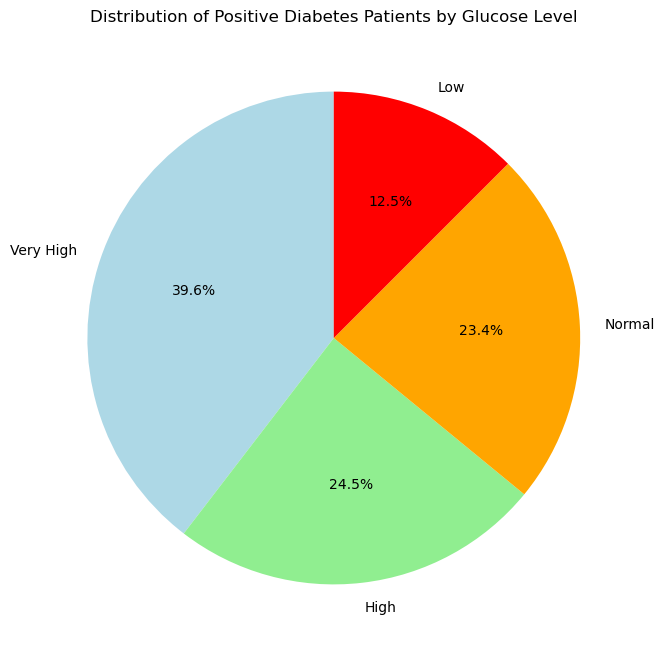

In [15]:
threshold = np.mean(Y)
positive_patients = Y >= threshold

bins = [-1.377672e-01,  -3.317903e-02, -1.077698e-03,2.791705e-02, 1.356118e-01]
labels = ['Low', 'Normal', 'High', 'Very High']
df['glucose_category'] = pd.cut(df['s6'], bins= bins, labels = labels)

positive_counts = df[positive_patients]['glucose_category'].value_counts()
print(positive_counts)

plt.figure(figsize=(8,8))
plt.pie(positive_counts, labels=positive_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'red'])
plt.title('Distribution of Positive Diabetes Patients by Glucose Level')
plt.show()

### Boxplot

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_12593/3720948778.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.values, labels=df.columns, vert=False)


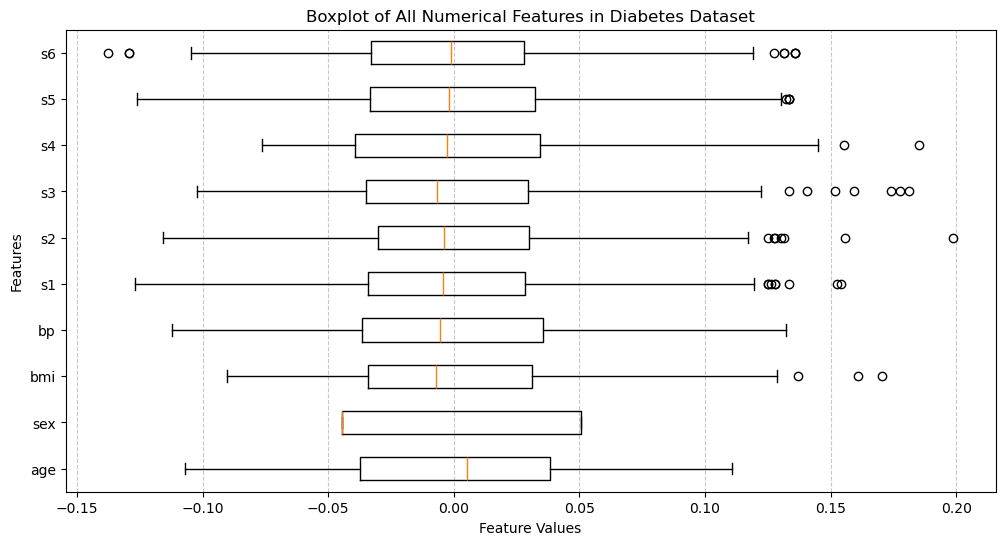

In [23]:
# Load the diabetes dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Plotting the boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df.values, labels=df.columns, vert=False)
plt.title("Boxplot of All Numerical Features in Diabetes Dataset")
plt.xlabel("Feature Values")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Areaplot

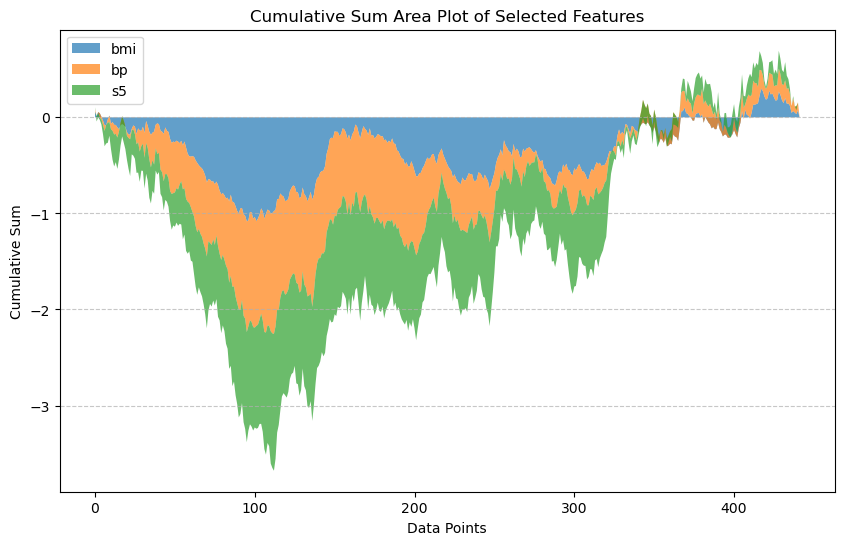

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Select a few features to visualize magnitude change
selected_features = ['bmi', 'bp', 's5']

# Calculate cumulative sum for the selected features
cumulative_df = df[selected_features].cumsum()

# Plotting the area plot
plt.figure(figsize=(10, 6))
plt.stackplot(range(len(cumulative_df)), cumulative_df['bmi'], cumulative_df['bp'], cumulative_df['s5'], labels=selected_features, alpha=0.7)
plt.title("Cumulative Sum Area Plot of Selected Features")
plt.xlabel("Data Points")
plt.ylabel("Cumulative Sum")
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()